## 107810037 蘇勇達 - Lab6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv('D:\\Learning_python\\data_science\\HW3\\data_science_data.csv',index_col=0)

In [3]:
#提取資料
data = data[['date','證券名稱','收盤價']]
#更改名字
data = data.rename(columns = {'證券名稱':'name'})
data = data.rename(columns = {'收盤價':'closing_price'})
#清理資料
data['closing_price'] = data['closing_price'].replace({'\$': '', ',': '', '--':np.nan}, regex=True)
data = data.dropna()
#更改資料型態
data['closing_price'] = data['closing_price'].astype('float64')
data['date'] = pd.to_datetime(data['date'])

In [4]:
data_group = data.groupby('name')

In [5]:
data_TSMC = data_group.get_group('台積電')
data_MTK = data_group.get_group('聯發科')
data_UMC = data_group.get_group('聯電')
#display(data_TSMC)
data_TSMC_mean = data_TSMC["closing_price"].mean()
data_MTK_mean = data_MTK["closing_price"].mean()
data_UMC_mean = data_UMC["closing_price"].mean()

### ANS: 台積電 聯發科 聯電 closing_price平均值

In [6]:
data_TSMC_mean = str(data_TSMC_mean)
print("台積電 mean closing price : " + data_TSMC_mean )
data_MTK_mean = str(data_MTK_mean)
print("聯發科 mean closing price : " + data_MTK_mean )
data_UMC_mean = str(data_UMC_mean)
print("聯電 mean closing price : " + data_UMC_mean )

台積電 mean closing price : 597.9876543209876
聯發科 mean closing price : 952.2263374485597
聯電 mean closing price : 56.4695473251029


### 台積電 聯發科 聯電 closing_price圖

<function matplotlib.pyplot.show(close=None, block=None)>

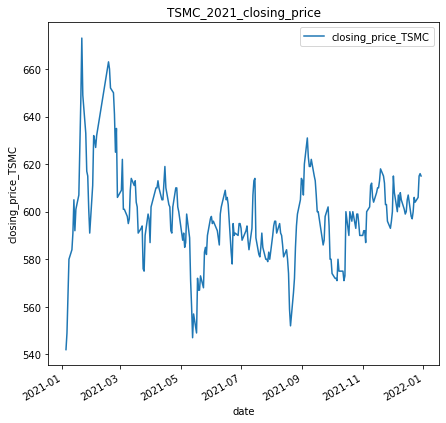

In [7]:
data_TSMC = data_TSMC.drop('name',axis = 1)
data_TSMC = data_TSMC.rename(columns = {'closing_price':'closing_price_TSMC'})
data_TSMC[pd.isnull(data_TSMC['closing_price_TSMC'])]
data_TSMC = data_TSMC.dropna()
#display(data_TSMC)
data_TSMC = data_TSMC.set_index('date')
data_TSMC.plot(figsize = (7,7), xlabel='date', ylabel='closing_price_TSMC', title='TSMC_2021_closing_price', legend=True)
plt.savefig("data_TSMC.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

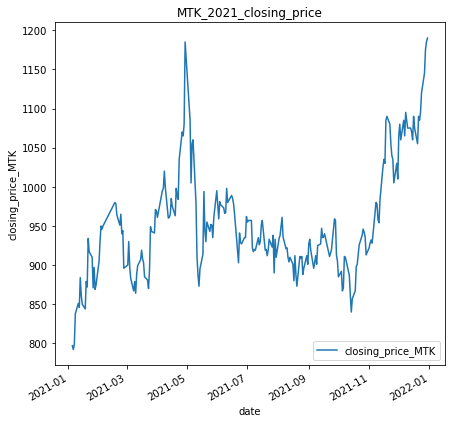

In [8]:
data_MTK = data_MTK.drop('name',axis = 1)
data_MTK = data_MTK.rename(columns = {'closing_price':'closing_price_MTK'})
data_MTK[pd.isnull(data_MTK['closing_price_MTK'])]
data_MTK = data_MTK.dropna()
#display(data_MTK)
data_MTK = data_MTK.set_index('date')
data_MTK.plot(figsize = (7,7), xlabel='date', ylabel='closing_price_MTK', title='MTK_2021_closing_price', legend=True)
plt.savefig("data_MTK.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

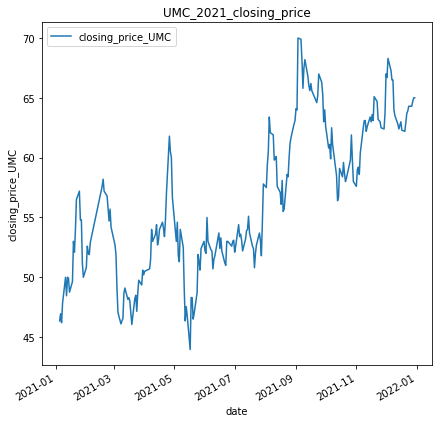

In [9]:
data_UMC = data_UMC.drop('name',axis = 1)
data_UMC = data_UMC.rename(columns = {'closing_price':'closing_price_UMC'})
data_UMC[pd.isnull(data_UMC['closing_price_UMC'])]
data_UMC = data_UMC.dropna()
#display(data_UMC)
data_UMC = data_UMC.set_index('date')
data_UMC.plot(figsize = (7,7), xlabel='date', ylabel='closing_price_UMC', title='UMC_2021_closing_price', legend=True)
plt.savefig("data_UMC.png")
plt.show

###  與台積電絕對值相關度排名第十名

In [10]:
data_TSMC = data[data['name']=='台積電'].reset_index(drop=True)
#製作一個新的dataframe去接資料
data_TSMC_corr_company = pd.DataFrame()
#製作所有公司的list，方法 : 將data的name這個columns刪除重複項
companies = data['name'].drop_duplicates()
data_TSMC_corr_company['company'] = companies
data_TSMC_corr_company['corr'] = 0

#利用apply遍歷所有公司
def get_corr(x):
    data_company = data[data['name']==x].reset_index(drop=True)
    return data_TSMC['closing_price'].corr(data_company['closing_price'])

data_TSMC_corr_company['corr'] = data_TSMC_corr_company['company'].apply(get_corr)

#絕對值並排續後的相關度dataframe
data_TSMC_corr_company['corr'] = data_TSMC_corr_company['corr'].abs()
sort_list = data_TSMC_corr_company.sort_values('corr',ascending = False)
#display(sort_list)

a = str(sort_list[9:10])
print("與台積電絕對值相關度排名第十名為\n"+ a)

與台積電絕對值相關度排名第十名為
      company      corr
96  國泰AI+Robo  0.667742


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
